In [2]:
import matplotlib.pyplot as plt
import pandas as pd
file_dir = "names"
def count_dynamics(years, name):
    acc = []
    for year in years:
        gl = {}
        gl = pd.read_csv(f"{file_dir}/yob{year}.txt",header = None)
        gl.columns = ["Name", "Gender", "Count"]
        gl["Year"] = year
        acc.append(gl)    
    total = pd.concat(acc)
    total.reset_index(drop=True, inplace=True)

    #res = total.groupby(["Year","Name"],as_index=False).sum()
    res = total.groupby(["Name","Year"],as_index=False).sum()[["Name","Count","Year"]]
    B_filter = name
    res2 = res.query("Name == @B_filter")
    return res2

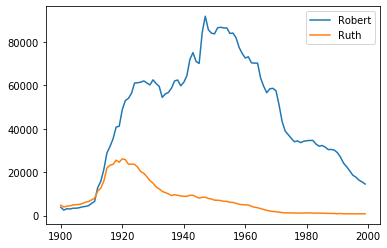

In [4]:
names = ["Robert","Ruth"]
for name in names:
    data = count_dynamics(range(1900,2000),name)
    plt.plot(data["Year"], data["Count"],label=name)
    plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
file_dir = "names"
def count_dynamics3(years, name):
    acc = []
    for year in years:
        gl = {}
        gl = pd.read_csv(f"{file_dir}/yob{year}.txt",header = None)
        gl.columns = ["Name", "Gender", "Count"]
        gl["Range_Year"] = int(year/5)*5
        acc.append(gl)    
    total = pd.concat(acc)
    total.reset_index(drop=True, inplace=True)
    return total[total["Name"].isin(name)].groupby(["Range_Year","Name"]).sum().unstack()


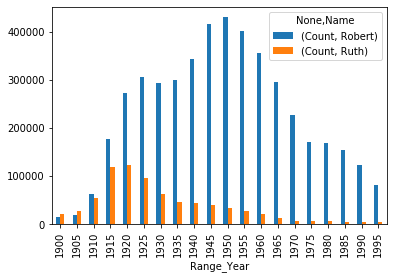

In [67]:
data3 = count_dynamics3(range(1900,2000),["Robert","Ruth"])
data3.plot(kind="bar")

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import re
file_dir = "names"
def regex_filter(val):
    if val:
        mo = re.search(r"R\S",val)
        if mo:
            return True
        else:
            return False
    else:
        return False
    
def count_dynamics4(year, letter):
    data = {}
    data = pd.read_csv(f"{file_dir}/yob{year}.txt",header = None)
    data.columns = ["Name", "Gender", "Count"]
    return data[data["Name"].apply(regex_filter)].groupby(["Name"]).sum().sort_values(by="Count",ascending=False).head(10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f099e4ce190>],
      dtype=object)

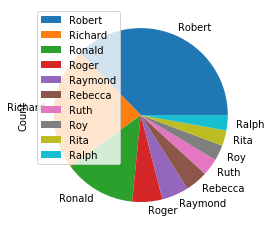

In [123]:
data5 = count_dynamics4(1950,"R")
data5.plot(kind="pie",subplots=True)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
file_dir = "names"
def get_wowels_count(word):
    return sum(x in 'aeiou' for x in word.lower())
    
def count_dynamics6(years):
    acc = []
    for year in years:
        gl = {}
        gl = pd.read_csv(f"{file_dir}/yob{year}.txt",header = None)
        gl.columns = ["Name", "Gender", "Count"]
        gl["Year"] =year
        acc.append(gl)    
    total = pd.concat(acc)
    total.reset_index(drop=True, inplace=True)
    res = total.groupby(["Name"],as_index=False).sum()[["Name","Count"]]
    res["Wowels"]= res["Name"].map(get_wowels_count)
    return res

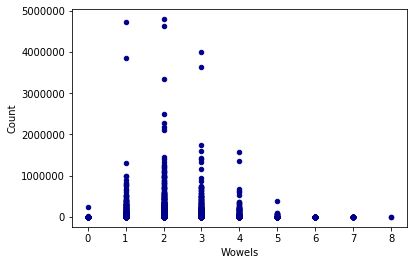

In [47]:
data6 = count_dynamics6(range(1900,2000))
data6
ax1 = data6.plot.scatter(x="Wowels",y="Count",c="DarkBlue")


